<a href="https://colab.research.google.com/github/AadityaSinha11/R2D2/blob/main/SSH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
! git clone git@github.com:AadityaSinha11/R2D2.git


fatal: destination path 'R2D2' already exists and is not an empty directory.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Parameters
N = 10  # Number of lattice sites
t1 = 1.0  # Intracell hopping parameter
t2 = 0.5  # Intercell hopping parameter
u = 0      # onsite energy


In [ ]:
# Create a k-vector
k_values = np.linspace(-np.pi, np.pi, 100)


In [ ]:
# Initialize arrays to store eigenvalues and eigenvectors
eigenvalues_array = np.zeros((len(k_values), N), dtype=complex)
eigenvectors_array = np.zeros((len(k_values), N, N), dtype=complex)


In [ ]:
# Calculate eigenvalues and eigenvectors for each k
for i, k_val in enumerate(k_values):
    # Create Hamiltonian matrix for current k
    H = np.zeros((N, N), dtype=complex)
    for j in range(N - 1):
        H[j, j + 1] = t1 + t2 * np.exp(-1j * k_val)
        H[j + 1, j] = np.conj(H[j, j + 1])
        H[j,j] = u
    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(H)
    eigenvalues_array[i] = eigenvalues
    eigenvectors_array[i] = eigenvectors


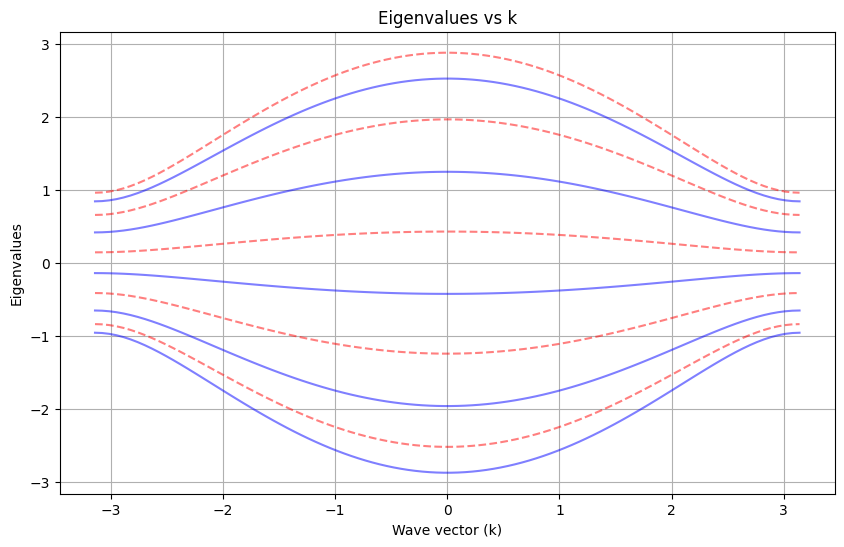

In [ ]:
# Plot eigenvalues vs k
plt.figure(figsize=(10, 6))
for i in range(N // 2):
    valence_band = np.real(eigenvalues_array[:, 2*i])
    conduction_band = np.real(eigenvalues_array[:, 2*i+1])
    plt.plot(k_values, valence_band, color='blue', alpha=0.5, label=f'Pair {i+1}: Valence Band')
    plt.plot(k_values, conduction_band, color='red', linestyle='--', alpha=0.5, label=f'Pair {i+1}: Conduction Band')

plt.title('Eigenvalues vs k')
plt.xlabel('Wave vector (k)')
plt.ylabel('Eigenvalues')
plt.grid(True)
#plt.legend()
plt.show()


In [ ]:
# Calculate phi(k)
phi_k_values = np.angle((t1 + t2 * np.exp(-1j * k_values)) / np.abs(t1 + t2 * np.exp(-1j * k_values)))


In [ ]:
# Compute the gradient of phi(k) with respect to k
gradient_phi_k = np.gradient(phi_k_values, k_values)


In [ ]:
# Compute the Berry connection A
A = -0.5 * gradient_phi_k

print(phi_k_values)


[ 1.22464680e-16  6.32121547e-02  1.24928120e-01  1.83794047e-01
  2.38708561e-01  2.88881270e-01  3.33838239e-01  3.73387086e-01
  4.07559970e-01  4.36550951e-01  4.60658756e-01  4.80240320e-01
  4.95676284e-01  5.07347274e-01  5.15618820e-01  5.20832691e-01
  5.23302680e-01  5.23313333e-01  5.21120503e-01  5.16952966e-01
  5.11014570e-01  5.03486600e-01  4.94530150e-01  4.84288387e-01
  4.72888646e-01  4.60444327e-01  4.47056596e-01  4.32815888e-01
  4.17803231e-01  4.02091411e-01  3.85745987e-01  3.68826180e-01
  3.51385650e-01  3.33473172e-01  3.15133237e-01  2.96406564e-01
  2.77330566e-01  2.57939745e-01  2.38266057e-01  2.18339221e-01
  1.98187006e-01  1.77835478e-01  1.57309231e-01  1.36631592e-01
  1.15824807e-01  9.49102116e-02  7.39083955e-02  5.28393477e-02
  3.17225993e-02  1.05773585e-02 -1.05773585e-02 -3.17225993e-02
 -5.28393477e-02 -7.39083955e-02 -9.49102116e-02 -1.15824807e-01
 -1.36631592e-01 -1.57309231e-01 -1.77835478e-01 -1.98187006e-01
 -2.18339221e-01 -2.38266

In [ ]:
# Compute the winding number
winding_number = np.trapz(A, dx=(2 * np.pi) / len(k_values)) / (np.pi)

print("Winding number:", winding_number)


Winding number: -8.834874115176436e-18


In [ ]:
# Range of t1/t2 values
t1_t2_values = np.linspace(-2, 2, 100)

In [ ]:
# Initialize an empty list to store winding numbers
winding_numbers = []


In [ ]:
# Initialize an empty list to store polarizations
polarizations = []

In [ ]:
# Loop over different values of t1/t2
for t1_t2 in t1_t2_values:
    # Parameters
    t2 = 1.0
    t1 = t1_t2 * t2

    # Create a k-vector with higher resolution
    k_values = np.linspace(-np.pi, np.pi, 100)

    # Initialize arrays to store eigenvalues and eigenvectors
    eigenvalues_array = np.zeros((len(k_values), N), dtype=complex)
    eigenvectors_array = np.zeros((len(k_values), N, N), dtype=complex)

    # Calculate eigenvalues and eigenvectors for each k
    for i, k_val in enumerate(k_values):
        # Create Hamiltonian matrix for current k
        H = np.zeros((N, N), dtype=complex)
        for j in range(N - 1):
            H[j, j + 1] = t1 + t2 * np.exp(-1j * k_val)
            H[j + 1, j] = np.conj(H[j, j + 1])
        # Calculate eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        eigenvalues_array[i] = eigenvalues
        eigenvectors_array[i] = eigenvectors

    # Calculate phi(k)
    phi_k_values = np.angle((t1 + t2 * np.exp(-1j * k_values)) / np.abs(t1 + t2 * np.exp(-1j * k_values)))

    # Compute the gradient of phi(k) with respect to k
    gradient_phi_k = np.gradient(phi_k_values, k_values)

    # Compute the Berry connection A
    A = -0.5 * gradient_phi_k

    # Compute the winding number
    winding_number = np.trapz(A, dx=(2 * np.pi) / len(k_values)) / (np.pi)

    # Append winding number to the list
    winding_numbers.append(winding_number)

    # Integrate A over the Brillouin zone to compute polarization
    polarization = np.trapz(A, dx=(2 * np.pi) / len(k_values)) / (2 * np.pi)

    # Append polarization to the list
    polarizations.append(polarization)


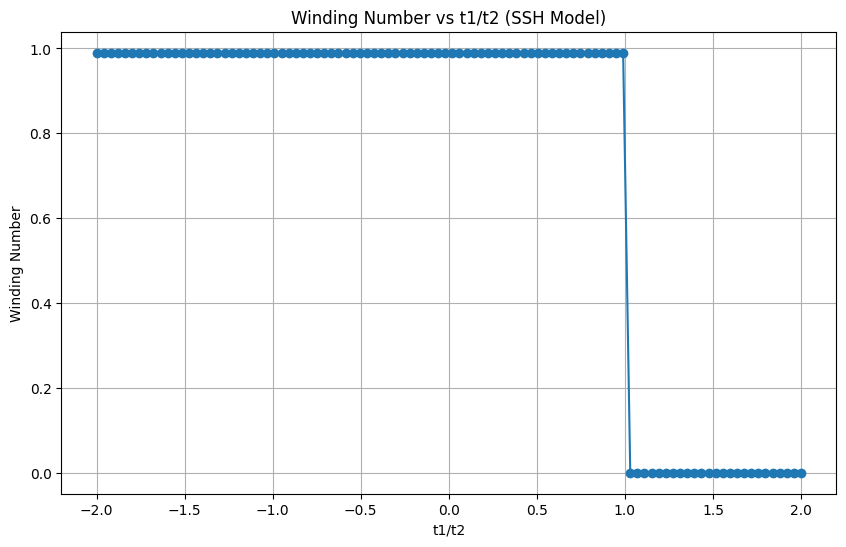

In [ ]:
# Plot winding number vs t1/t2
plt.figure(figsize=(10, 6))
plt.plot(t1_t2_values, winding_numbers, marker='o', linestyle='-')
plt.title('Winding Number vs t1/t2 (SSH Model)')
plt.xlabel('t1/t2')
plt.ylabel('Winding Number')
plt.grid(True)
plt.show()


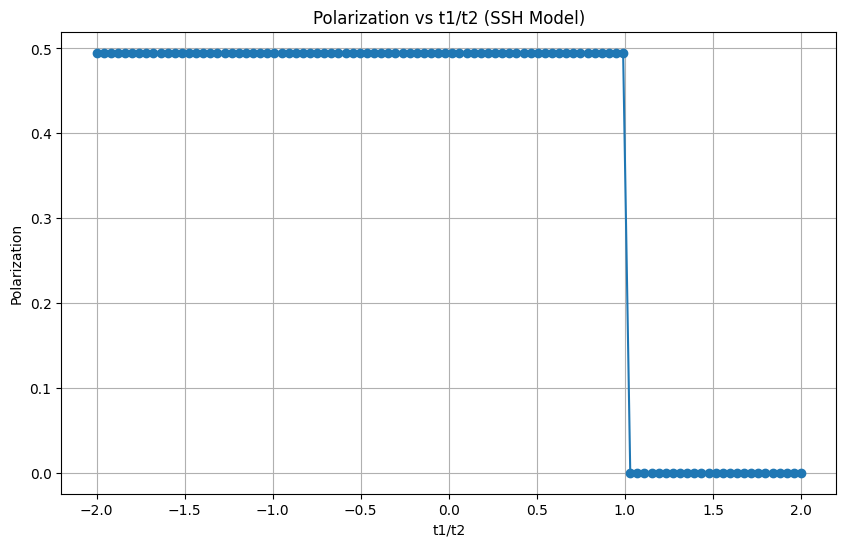

In [ ]:
# Plot polarization vs t1/t2
plt.figure(figsize=(10, 6))
plt.plot(t1_t2_values, polarizations, marker='o', linestyle='-')
plt.title('Polarization vs t1/t2 (SSH Model)')
plt.xlabel('t1/t2')
plt.ylabel('Polarization')
plt.grid(True)
plt.show()